In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# 1. Load the dataset
df = pd.read_csv('winequality-red.csv')


In [6]:
# 2. Preprocessing
# Convert quality into a binary class: 
# 1 if quality >= 7 (Good), 0 otherwise (Not Good)
df['quality_label'] = [1 if x >= 7 else 0 for x in df['quality']]

# Define features (X) and target (y)
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']



Low C = လမ်းကြောင်းကျယ်မယ်၊ အမှားအချို့ လက်ခံမယ် (Underfitting ဖြစ်နိုင်)။

High C = လမ်းကြောင်းကျဉ်းမယ်၊ အမှားကို လက်မ

In [7]:
# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature Scaling (Essential for SVM)
# SVM calculates distance; different units (e.g., pH vs. sulfates) will bias the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train Linear SVM
# We use a linear kernel as requested
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train)

# 6. Evaluation
predictions = svm_model.predict(X_test_scaled)

print("Accuracy Score:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n")
print(classification_report(y_test, predictions))

Accuracy Score: 0.853125

Classification Report:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.79       320



c:\Users\Naing\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Naing\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Naing\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

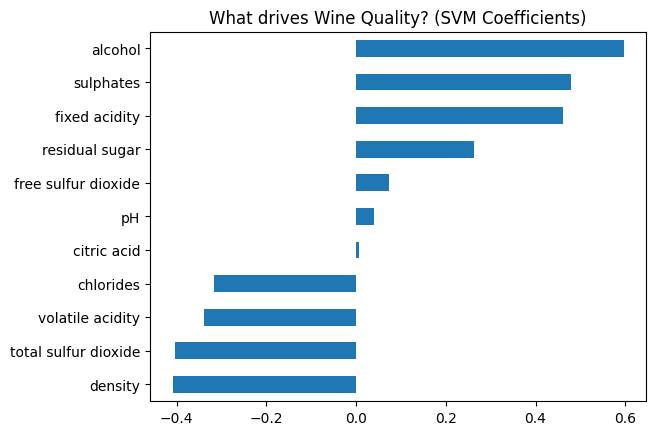

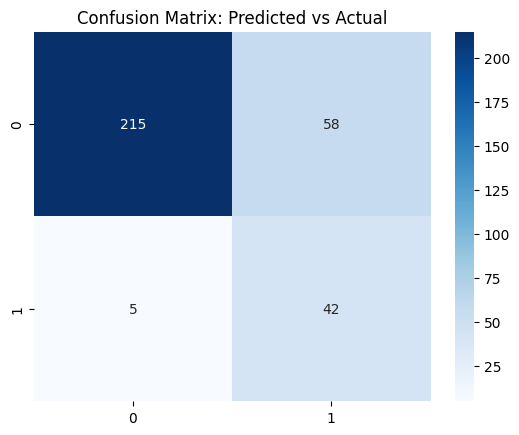

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 1. Setup
df = pd.read_csv('winequality-red.csv')
df['quality_label'] = (df['quality'] >= 7).astype(int)
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scale and Fit
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='linear', class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# 3. Visualize Feature Importance
importance = pd.Series(model.coef_[0], index=X.columns).sort_values()
importance.plot(kind='barh', title='What drives Wine Quality? (SVM Coefficients)')
plt.show()

# 4. Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, model.predict(X_test_scaled)), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Predicted vs Actual')
plt.show()
#

ဒီ ပုံတွေကို ကြည့်ပြီး ဝိုင်ကောင်း (Good Quality) လားဆိုတာ ဘယ်လိုသိနိုင်မလဲဆိုတာကို အောက်ပါအတိုင်း အလွယ်ကူဆုံး ရှင်းပြပေးပါမယ် -

### ၁။ Feature Importance (ဓါတုဗေဒ အင်္ဂါရပ်များ၏ အရေးပါမှုပုံ)

ဒီပုံက ဝိုင်ရဲ့ အရည်အသွေးကို ဘယ်ဓါတုဗေဒ အချက်အလက်တွေက အဆုံးအဖြတ်ပေးသလဲဆိုတာကို ပြတာဖြစ်ပါတယ်။

* **ညာဘက်သို့ ထွက်နေသော အပြာရောင်တန်းများ (Positive Coefficients):** ဒီအချက်တွေ များလေလေ ဝိုင်အရည်အသွေး ကောင်းလေလေဖြစ်ပါတယ်။
* **Alcohol:** အရက်ပါဝင်မှုနှုန်း မြင့်မားခြင်းက ဝိုင်ကောင်းဖို့အတွက် အဓိကအကျဆုံး အချက်ဖြစ်တာကို တွေ့ရပါတယ်။
* **Sulphates:** ဆာလဖိတ် ပါဝင်မှု သင့်တင့်မျှတစွာ များခြင်းကလည်း အရည်အသွေးကို ပိုကောင်းစေပါတယ်။
* **Fixed Acidity:** အက်ဆစ်ဓာတ် အချို့က ဝိုင်ကို ပိုမိုကောင်းမွန်စေပါတယ်။


* **ဘယ်ဘက်သို့ ထွက်နေသော အပြာရောင်တန်းများ (Negative Coefficients):** ဒီအချက်တွေ များလာရင်တော့ ဝိုင်အရည်အသွေး ကျဆင်းစေပါတယ်။
* **Volatile Acidity:** ဒါက ဝိုင်ကို ရှာလကာရည်လို အနံ့မျိုး ဖြစ်စေတဲ့ အက်ဆစ်ပါ။ ဒါများရင် ဝိုင်မကောင်းတော့ပါဘူး။
* **Total Sulfur Dioxide & Density:** ဒီဓာတ်တွေနဲ့ သိပ်သည်းဆ များလွန်းရင်လည်း ဝိုင်အရည်အသွေးကို ကျဆင်းစေပါတယ်။



---

### ၂။ Confusion Matrix (ခန့်မှန်းချက် မှန်/မမှန် စစ်ဆေးသည့်ပုံ)

ဒီပုံကတော့ ကျနော်တို့ရဲ့ Model က ဝိုင်ကောင်းတွေကို ဘယ်လောက်အထိ မှန်မှန်ကန်ကန် ခွဲခြားပေးနိုင်သလဲဆိုတာကို ပြတာပါ။

* **ညာဘက်အောက်ထောင့်ကွက် (True Positive - 42):** ဒါကတော့ တကယ်လည်း ဝိုင်ကောင်းဖြစ်သလို Model ကလည်း "ဝိုင်ကောင်း (Good)" လို့ မှန်ကန်စွာ ခွဲခြားပေးနိုင်ခဲ့တဲ့ အရေအတွက် ဖြစ်ပါတယ်။
* **ဘယ်ဘက်အပေါ်ထောင့်ကွက် (True Negative - 215):** ဒါကတော့ သာမန်ဝိုင်တွေကို "သာမန် (Not Good)" လို့ မှန်ကန်စွာ ခွဲခြားပေးခဲ့တာပါ။
* **အရောင်ရင့်လေလေ:** ထိုအကွက်ထဲတွင် အရေအတွက် များလေလေဖြစ်ပြီး Model ရဲ့ ခန့်မှန်းချက် ပိုမိုတိကျလေလေ ဖြစ်ပါတယ်။

---

### အနှစ်ချုပ်ကြည့်ရလျှင် -

သင်ဟာ ဝိုင်ကောင်းတစ်ပုလင်းကို ရှာနေတယ်ဆိုရင် ဒီ Data အရ **Alcohol** ပါဝင်မှု မြင့်မားပြီး၊ **Volatile Acidity** (ရှာလကာရည်နံ့) အားနည်းကာ၊ **Sulphates** ပါဝင်မှု သင့်တင့်တဲ့ ဝိုင်မျိုးကို ရွေးချယ်သင့်ကြောင်း ဒီပုံတွေက သက်သေပြနေပါတယ်။s